# Pandemic Vulnerability Index (PVI)

----------


### Final csv `PVI_05_Oct_results_clean.csv`

- shape (3142, 16)

14 key factors
       
- 'Infection Rate: Transmissible Cases 
- 'Infection Rate: Disease Spread
- 'Pop Concentration: Pop Mobility
- 'Pop Concentration: Residential Density
- 'Intervention: Vaccines
- 'Intervention: Social Distancing
- 'Intervention: Testing
- 'Health & Environment: Hospital Beds
- 'Health & Environment: Hospital Ventilators
- 'Health & Environment: Pop Demographics
- 'Health & Environment: Air Pollution
- 'Health & Environment: Age Distribution
- 'Health & Environment: Co-morbidities
- 'Health & Environment: Health Disparities


CONFUSED:

Here https://www.niehs.nih.gov/research/programs/coronavirus/covid19pvi/details/ it says vaccines means % of unvaccinated
But here https://github.com/COVID19PVI/data/blob/master/PVI_codebook.pdf it says % of vaccinated population

The original key indicators from the data, their weights in the final PVI and their meaning.
The PVI model gives an idex for each of these in the dataset we are currently exploring.
       
- Infection Rate = 25% in total
  - Transmissible Cases = 20% 
      - Daily
      - The initial number represented cases from the last 14 days divided by population size. Because of the 14-day incubation period, the cases identified in that time period are the most likely to be transmissible. This metric is the number of such “contagious” individuals relative to the population, so a greater number indicates more likely continued spread of disease.
  - Disease Spread = 5%
      - Daily
      - The initial number represented Fraction of total cases that are from the last 14 days (one incubation period). Because COVID-19 is thought to have an incubation period of about 14 days, only a sustained decline in new infections over 2 weeks is sufficient to signal reduction in disease spread. This metric is always between 0 and 1, with values near 1 during exponential growth phase, and declining linearly to zero over 14 days if there are no new infections.
- Pop Concentration = 15% in total
  - Pop Mobility = 10%
      - Static
      - The initial number represented Estimated daytime population. Greater daytime population density is expected to increase the spread of infection because more people are in closer proximity to each other.
  - Residential Density = 5%
      - Static
      - The initial number represented Average traffic volume per meter of major roadways in the county from 2018 EPA EJSCREEN. Greater traffic volume is expected to increase the spread of infection due to more people moving and interaction.
- Intervention Measures: 25%
  - Vaccines = 15%
      - Daily
      - The initial number represented Percentage of unvaccinated residents. Disease spread will be reduced with fewer unvaccinated residents.
   - Social Distancing = 5%
       - Daily
       - The initial number represented Unacast social distancing scoreboard grade is assigned by looking at the change in overall distance travelled and the change in nonessential visits relative to baseline (previous year), based on cell phone mobility data. The grade is converted to a numerical score, with higher values being less social distancing (worse score) is expected to increase the spread of infection because more people are interacting with other.
    - Testing = 5%   
       - Daily
       - The initial number represented Population divided by tests performed (currently only state-wide statistics are available). This is the inverse of the tests per population, so greater numbers indicate less testing. Lower testing rates mean it is more likely that infections are undetected, so would be expected to increase the spread of infection.
- Health & Environment = 35% in total
   - Hospital Beds = 10%
       - Daily
       - The initial number represented Summation of hospital beds for hospitals with “OPEN” status and “GENERAL MEDIAL AND SURGICAL” description.
   - Hospital Ventilators = 10%
       - Daily 
       - The initial number represented Percentage of ventilators in use. This is the percentage of ventilators across all medical facility that are being used by patients for any medical condition.
   - Pop Demographics = 3%
       - Static
       - The initial numbers here took into considertation the Percentage of population who self-identify as Black or African American and 	Percentage of population who self-identify as American Indian or Alaska Native.
   - Air Pollution = 3 %
       - Static
       - The initial number represented
   - Age Distribution
       - Static
       - The initial number represented
   - Co-morbidities
       - Static
        - The initial number represented
   - Health Disparities
       - Static
        - The initial number represented

#### The index for each measure is from 0 to 1. Higher values mean worse conditions. The total PVI is calculated linearly from all the measures, each with their respective weight. A higher PVI means higher Vulnerability. 


In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import os
from pathlib import Path
import csv

project_path = str(Path().resolve().parent)
print(project_path)
raw_csv_files = project_path + '\\data\\raw\\'

import sys
sys.path.append(project_path)

print(raw_csv_files)

C:\Users\iovuf\Projects\DS4A_team27
C:\Users\iovuf\Projects\DS4A_team27\data\raw\


In [2]:
pvi = pd.read_csv(raw_csv_files+'PVI_05_Oct_2021_results.csv', delimiter=',')
pvi.head()

,ToxPi Score,HClust Group,KMeans Group,Name,Source,Infection Rate: Transmissible Cases!20!0xcc3333ff,Infection Rate: Disease Spread!5!0xe64d4dff,Pop Concentration: Pop Mobility!10!0x57b757ff,Pop Concentration: Residential Density!5!0x5ced5cff,Intervention: Vaccines!15!0x4258c9ff,Intervention: Social Distancing!5!0x6079f7ff,Intervention: Testing!5!0x7d90f3ff,Health & Environment: Hospital Beds!10!0x6b0b9eff,Health & Environment: Hospital Ventilators!10!0x7e24aeff,Health & Environment: Pop Demographics!3!0x933fbfff,Health & Environment: Air Pollution!3!0xa95ad2ff,Health & Environment: Age Distribution!3!0xc177e7ff,Health & Environment: Co-morbidities!3!0xdb95feff,Health & Environment: Health Disparities!3!0xe1a6ffff
0,0.685542,4,7,"West Virginia, Lewis","-80.4999,38.9947",0.897321,0.813586,0.481705,0.8475,0.713996,0.825,0.129868,0.879630,0.65600,0.178758,0.383234,0.611412,0.581551,0.459948
1,0.671962,6,5,"Georgia, Stewart","-84.8321,32.08",0.935473,0.803198,0.448226,0.7759,0.832657,0.325,0.489289,0.750000,0.32896,0.708966,0.479042,0.514201,0.496773,0.720375
2,0.660540,4,7,"West Virginia, Cabell","-82.2386,38.4242",0.758317,0.710158,0.651184,0.8080,0.793103,1.000,0.146768,0.796296,0.40800,0.358955,0.443114,0.575510,0.560518,0.432459
3,0.657938,4,7,"West Virginia, Logan","-81.9353,37.83",0.770688,0.716434,0.539986,0.7217,0.708925,0.750,0.244161,0.805556,0.66400,0.227253,0.407186,0.589885,0.689641,0.582461
4,0.651946,4,7,"West Virginia, Raleigh","-81.2456,37.7694",0.722343,0.688827,0.564036,0.7074,0.797160,1.000,0.203223,0.805556,0.47200,0.427169,0.371257,0.611412,0.582461,0.466755


In [3]:
# Check for nan
pvi.isnull().values.any()

False

In [4]:
pvi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ToxPi Score                                               3142 non-null   float64
 1   HClust Group                                              3142 non-null   int64  
 2   KMeans Group                                              3142 non-null   int64  
 3   Name                                                      3142 non-null   object 
 4   Source                                                    3142 non-null   object 
 5   Infection Rate: Transmissible Cases!20!0xcc3333ff         3142 non-null   float64
 6   Infection Rate: Disease Spread!5!0xe64d4dff               3142 non-null   float64
 7   Pop Concentration: Pop Mobility!10!0x57b757ff             3142 non-null   float64
 8   Pop Concentration:

In [5]:
pvi.shape

(3142, 19)

In [6]:
print(pvi["Name"].nunique())
print(pvi["HClust Group"].nunique())
print(pvi["KMeans Group"].nunique())

3142
10
10


In [7]:
pvi.describe()

,ToxPi Score,HClust Group,KMeans Group,Infection Rate: Transmissible Cases!20!0xcc3333ff,Infection Rate: Disease Spread!5!0xe64d4dff,Pop Concentration: Pop Mobility!10!0x57b757ff,Pop Concentration: Residential Density!5!0x5ced5cff,Intervention: Vaccines!15!0x4258c9ff,Intervention: Social Distancing!5!0x6079f7ff,Intervention: Testing!5!0x7d90f3ff,Health & Environment: Hospital Beds!10!0x6b0b9eff,Health & Environment: Hospital Ventilators!10!0x7e24aeff,Health & Environment: Pop Demographics!3!0x933fbfff,Health & Environment: Air Pollution!3!0xa95ad2ff,Health & Environment: Age Distribution!3!0xc177e7ff,Health & Environment: Co-morbidities!3!0xdb95feff,Health & Environment: Health Disparities!3!0xe1a6ffff
count,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,0.488612,7.322724,5.236155,0.540921,0.531990,0.536541,0.499970,0.574027,0.793444,0.347941,0.555690,0.133246,0.435471,0.356606,0.575512,0.368075,0.367973
std,0.069216,2.529341,2.839368,0.162777,0.151813,0.103473,0.288812,0.122937,0.199015,0.109513,0.206101,0.143361,0.160319,0.122929,0.094468,0.121930,0.198165
min,0.220985,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.450604,6.000000,3.000000,0.475722,0.474531,0.475187,0.249975,0.490872,0.675000,0.278627,0.416667,0.000000,0.308555,0.275449,0.522135,0.283571,0.200017
50%,0.494680,8.000000,5.000000,0.565258,0.549677,0.532251,0.499800,0.572008,0.750000,0.336309,0.581019,0.096000,0.433198,0.377246,0.579674,0.359220,0.365582
75%,0.535437,10.000000,8.000000,0.637865,0.621962,0.595997,0.749800,0.649087,1.000000,0.411317,0.712963,0.216000,0.568741,0.443114,0.633558,0.448053,0.529676
max,0.685542,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
pvi.columns

Index(['ToxPi Score', 'HClust Group', 'KMeans Group', 'Name', 'Source',
       'Infection Rate: Transmissible Cases!20!0xcc3333ff',
       'Infection Rate: Disease Spread!5!0xe64d4dff',
       'Pop Concentration: Pop Mobility!10!0x57b757ff',
       'Pop Concentration: Residential Density!5!0x5ced5cff',
       'Intervention: Vaccines!15!0x4258c9ff',
       'Intervention: Social Distancing!5!0x6079f7ff',
       'Intervention: Testing!5!0x7d90f3ff',
       'Health & Environment: Hospital Beds!10!0x6b0b9eff',
       'Health & Environment: Hospital Ventilators!10!0x7e24aeff',
       'Health & Environment: Pop Demographics!3!0x933fbfff',
       'Health & Environment: Air Pollution!3!0xa95ad2ff',
       'Health & Environment: Age Distribution!3!0xc177e7ff',
       'Health & Environment: Co-morbidities!3!0xdb95feff',
       'Health & Environment: Health Disparities!3!0xe1a6ffff'],
      dtype='object')

In [9]:
# Change column names

pvi = pvi.rename(columns={
    "Infection Rate: Transmissible Cases!20!0xcc3333ff": "Transmissible Cases", 
    "Infection Rate: Disease Spread!5!0xe64d4dff": "Disease Spread",
    'Pop Concentration: Pop Mobility!10!0x57b757ff': 'Pop Mobility',
    'Pop Concentration: Residential Density!5!0x5ced5cff': 'Residential Density',
    'Intervention: Vaccines!15!0x4258c9ff':  'Vaccines',
    'Intervention: Social Distancing!5!0x6079f7ff': 'Social Distancing',
    'Intervention: Testing!5!0x7d90f3ff': 'Testing',
    'Health & Environment: Hospital Beds!10!0x6b0b9eff': 'Hospital Beds',
    'Health & Environment: Hospital Ventilators!10!0x7e24aeff': 'Hospital Ventilators',
    'Health & Environment: Pop Demographics!3!0x933fbfff': 'Pop Demographics',
    'Health & Environment: Air Pollution!3!0xa95ad2ff': 'Air Pollution',
    'Health & Environment: Age Distribution!3!0xc177e7ff': 'Age Distribution',
    'Health & Environment: Co-morbidities!3!0xdb95feff': 'Co-morbidities',
    'Health & Environment: Health Disparities!3!0xe1a6ffff': 'Health Disparities',
    })

In [10]:
# drop HClust Group and KMeans Groups 
pvi = pvi.drop(["HClust Group","KMeans Group", "Source"], axis=1)

In [11]:
pvi

,ToxPi Score,Name,Transmissible Cases,Disease Spread,Pop Mobility,Residential Density,Vaccines,Social Distancing,Testing,Hospital Beds,Hospital Ventilators,Pop Demographics,Air Pollution,Age Distribution,Co-morbidities,Health Disparities
0,0.685542,"West Virginia, Lewis",0.897321,0.813586,0.481705,0.8475,0.713996,0.825,0.129868,0.879630,0.65600,0.178758,0.383234,0.611412,0.581551,0.459948
1,0.671962,"Georgia, Stewart",0.935473,0.803198,0.448226,0.7759,0.832657,0.325,0.489289,0.750000,0.32896,0.708966,0.479042,0.514201,0.496773,0.720375
2,0.660540,"West Virginia, Cabell",0.758317,0.710158,0.651184,0.8080,0.793103,1.000,0.146768,0.796296,0.40800,0.358955,0.443114,0.575510,0.560518,0.432459
3,0.657938,"West Virginia, Logan",0.770688,0.716434,0.539986,0.7217,0.708925,0.750,0.244161,0.805556,0.66400,0.227253,0.407186,0.589885,0.689641,0.582461
4,0.651946,"West Virginia, Raleigh",0.722343,0.688827,0.564036,0.7074,0.797160,1.000,0.203223,0.805556,0.47200,0.427169,0.371257,0.611412,0.582461,0.466755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,0.248475,"Nebraska, Boyd",0.000000,0.000000,0.363081,0.0847,0.702840,0.500,0.501505,0.000000,0.02000,0.177335,0.197605,0.746994,0.366560,0.192518
3138,0.246382,"Nebraska, Thayer",0.000000,0.000000,0.382669,0.0608,0.593306,0.500,0.407384,0.240741,0.00000,0.190008,0.305389,0.703592,0.280604,0.074936
3139,0.231094,"Nebraska, Rock",0.000000,0.000000,0.367544,0.0713,0.690669,0.325,0.000000,0.240741,0.00000,0.170149,0.173653,0.733538,0.400125,0.084218
3140,0.227011,"Nebraska, Fillmore",0.000000,0.000000,0.414176,0.0656,0.540568,0.325,0.427897,0.138889,0.00000,0.306420,0.311377,0.675859,0.275519,0.087294


In [12]:
corrm = pvi.corr()
corrm

,ToxPi Score,Transmissible Cases,Disease Spread,Pop Mobility,Residential Density,Vaccines,Social Distancing,Testing,Hospital Beds,Hospital Ventilators,Pop Demographics,Air Pollution,Age Distribution,Co-morbidities,Health Disparities
ToxPi Score,1.000000,0.624933,0.565375,0.428731,0.442718,0.230463,0.513017,-0.197977,0.553255,0.576356,0.264496,0.447412,-0.223803,0.380980,0.358719
Transmissible Cases,0.624933,1.000000,0.929620,0.028696,0.036554,0.023859,0.077114,-0.301728,0.059481,0.080468,-0.103672,0.065131,0.030807,0.182856,0.064989
Disease Spread,0.565375,0.929620,1.000000,0.051660,-0.005634,-0.040216,0.055119,-0.343810,0.108878,0.065479,-0.133953,0.009933,0.091015,0.061201,-0.026269
Pop Mobility,0.428731,0.028696,0.051660,1.000000,0.230672,-0.327759,0.741620,-0.312972,0.439354,0.438797,0.147191,0.472878,-0.371701,-0.191135,-0.167641
Residential Density,0.442718,0.036554,-0.005634,0.230672,1.000000,-0.046542,0.186757,-0.105112,0.172918,0.196388,0.477293,0.098258,-0.316588,0.282539,0.516467
Vaccines,0.230463,0.023859,-0.040216,-0.327759,-0.046542,1.000000,-0.139875,0.241650,-0.100501,-0.039659,-0.034011,0.124906,0.094082,0.380023,0.312521
Social Distancing,0.513017,0.077114,0.055119,0.741620,0.186757,-0.139875,1.000000,-0.215463,0.416931,0.441170,0.144144,0.534091,-0.340158,-0.037273,-0.077773
Testing,-0.197977,-0.301728,-0.343810,-0.312972,-0.105112,0.241650,-0.215463,1.000000,-0.246276,-0.118721,0.116050,-0.063889,0.020108,0.184893,0.238826
Hospital Beds,0.553255,0.059481,0.108878,0.439354,0.172918,-0.100501,0.416931,-0.246276,1.000000,0.465311,0.107058,0.224280,-0.183594,-0.049158,-0.064212
Hospital Ventilators,0.576356,0.080468,0.065479,0.438797,0.196388,-0.039659,0.441170,-0.118721,0.465311,1.000000,0.206457,0.336071,-0.241424,0.085186,0.101834


In [14]:
corrm["Vaccines"][corrm['Vaccines']>0].sort_values(ascending=False).to_frame()

,Vaccines
Vaccines,1.000000
Co-morbidities,0.380023
Health Disparities,0.312521
Testing,0.241650
ToxPi Score,0.230463
Air Pollution,0.124906
Age Distribution,0.094082
Transmissible Cases,0.023859


In [15]:
corrm["Vaccines"][corrm['Vaccines']<0].sort_values(ascending=True).to_frame()

,Vaccines
Pop Mobility,-0.327759
Social Distancing,-0.139875
Hospital Beds,-0.100501
Residential Density,-0.046542
Disease Spread,-0.040216
Hospital Ventilators,-0.039659
Pop Demographics,-0.034011


<AxesSubplot:xlabel='Vaccines'>

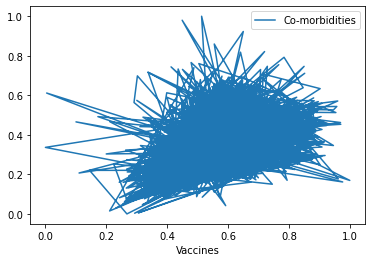

In [16]:
# Plot vaccines against the other factors
pvi.plot(x='Vaccines', y='Co-morbidities')

<AxesSubplot:xlabel='Vaccines'>

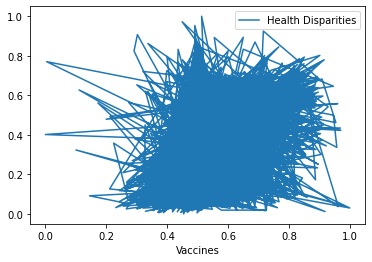

In [23]:
pvi.plot(x='Vaccines', y='Health Disparities')

<AxesSubplot:xlabel='Vaccines'>

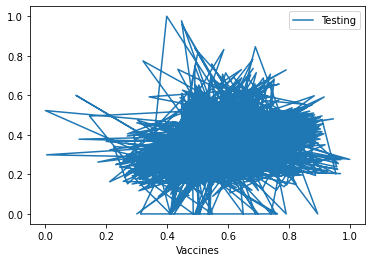

In [24]:
pvi.plot(x='Vaccines', y='Testing')

<AxesSubplot:xlabel='Vaccines'>

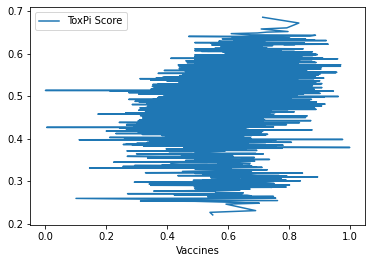

In [25]:
pvi.plot(x='Vaccines', y='ToxPi Score')

<AxesSubplot:xlabel='Vaccines'>

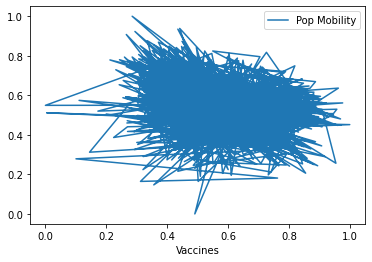

In [26]:
pvi.plot(x='Vaccines', y='Pop Mobility')

<AxesSubplot:title={'center':'Vaccines'}, ylabel='Frequency'>

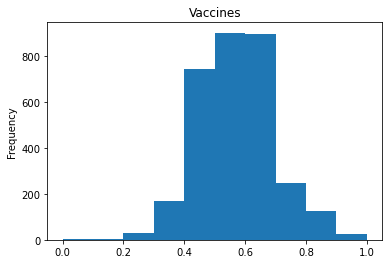

In [27]:
# The higher the score, the worse the vulnerability. The plot is centered around 0.6 with values generally high, hence vaccination rates are low.
pvi["Vaccines"].plot.hist(title="Vaccines")

In [28]:
pvi.shape

(3142, 16)

In [30]:
pvi.to_csv('PVI_05_Oct_results_clean.csv', index=False)  

## Future ideas
Predict vaccines using the other factors